In [1]:
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os

In [2]:
datadir = "train_4/"
target_arr = []
data_arr = []

for index in range(len(os.listdir(datadir))):
    folder_path=(os.path.join(datadir,os.listdir(datadir)[index])) 
    for file in os.listdir(folder_path):
        target_arr.append(index)
        img_array = imread(os.path.join(folder_path,file))
        img_resized = resize(img_array,(64,64,3))
        data_arr.append(img_resized)
    print(os.listdir(datadir)[index])
target = np.array(target_arr)
data = np.array(data_arr)

01_palm
02_l
03_fist
04_fist_moved
05_thumb
06_index
07_ok
08_palm_moved
09_c
10_down


In [3]:
category = ["palm","L","fist","fist_moved","thumb","index","ok","palm_moved","C","down"]
x = data
y = target
len(data)

2000

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
len(x_test)

600

In [5]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(category[y[index]])

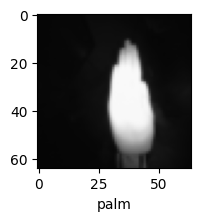

In [6]:
plot_sample(x_train,y_train,8)

In [7]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4702 - loss: 1.5242
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9901 - loss: 0.0258
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 7.1435e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 1.0000 - loss: 3.5464e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 2.7675e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 1.9153e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 2.2113e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9969 - loss: 0.0071
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9937 - loss: 0.0120


In [10]:
cnn.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9995 - loss: 0.0019


[0.0033512040972709656, 0.9983333349227905]

In [11]:
y_predict = cnn.predict(x_test)
y_result = [np.argmax(element) for element in y_predict]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


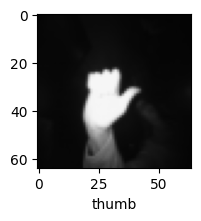

In [12]:
plot_sample(x_test,y_test,0)

In [13]:
report = classification_report(y_test,y_result)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        58\n           1       1.00      1.00      1.00        64\n           2       0.98      1.00      0.99        58\n           3       1.00      1.00      1.00        63\n           4       1.00      0.98      0.99        61\n           5       1.00      1.00      1.00        57\n           6       1.00      1.00      1.00        57\n           7       1.00      1.00      1.00        54\n           8       1.00      1.00      1.00        65\n           9       1.00      1.00      1.00        63\n\n    accuracy                           1.00       600\n   macro avg       1.00      1.00      1.00       600\nweighted avg       1.00      1.00      1.00       600\n'

In [16]:
from tensorflow.keras import models, layers
y_predicted = cnn.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [18]:
from sklearn.metrics import confusion_matrix

print("y_test shape:", y_test.shape)
print("y_predicted shape:", y_predicted.shape)

y_predicted_classes = np.argmax(y_predicted, axis=1)

c = confusion_matrix(y_test, y_predicted_classes)
print(c)

y_test shape: (600,)
y_predicted shape: (600, 10)
[[58  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  0  0  0]
 [ 0  0  1  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 57  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  0  0  0  0  0  0  0 65  0]
 [ 0  0  0  0  0  0  0  0  0 63]]
